2 February 2026

Feature Scaling (normalization, standardization)
Feature Encoding techniques (label encoding, one hot encoding)

1. What is Feature Scaling?

Feature scaling is a technique to normalize the range of independent variables or features of data.

Why we need it:

Many machine learning algorithms (like KNN, SVM, gradient descent-based models) are sensitive to the magnitude of features.

If one feature has values from 1–10 and another from 1–10,000, the algorithm will give more importance to the larger scale feature.

Scaling ensures all features contribute equally.

2. Types of Feature Scaling

The two most common methods are:

Normalization (Min-Max Scaling)

Standardization (Z-score Scaling)

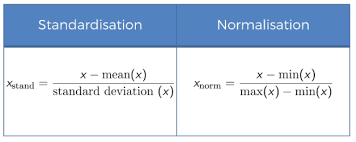



2.1 Normalization (Min-Max Scaling)
1. What is Normalization?
      - Normalization is a way to shrink numbers into a small, fixed range, usually 0 to 1.
      - It’s like resizing all your measurements so they fit nicely in the same “box.”
      - Purpose: Makes all features comparable, so no single feature dominates calculations.


2. Formula:

      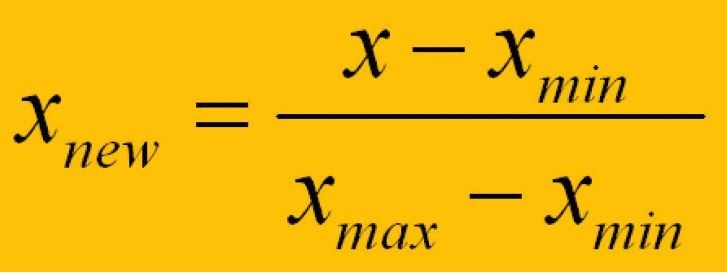

      Where:
           X = original value

           X min = smallest value of that feature

           X max = largest value of that feature

           X normalized = new value between 0 and 1


3. Example
   - Suppose we have heights of 5 friends (in cm): [150, 160, 170, 180, 190]
    
     1. Find min and max:
        - Min = 150
        - Max = 190
     2. Normalize 160:
           Xnormalized ​= 160−150 / (190−150) ​= 10 / 40 = 0.25


     3. Normalize all:

         Original Height	Normalized Height
             150	                0
             160	                0.25
             170                  0.5
             180	                0.75
             190	                1


4. Analogy :
       - Imagine shrinking a long ruler (cm) to fit inside a 1-meter box (0–1).
       - All measurements now fit in the same small range, making comparisons fair.


5. Pros & Cons

     Pros:
       - Good for Neural Networks, images, or data with similar range needs
        - Easy to understand and apply

     Cons:
       - Sensitive to outliers → one extremely large value can squash all other numbers​

1. What is Standardization?

   - Standardization is a way to rescale numbers so that their average becomes 0 and the “spread” is measured in standard deviation units.
   - Simply: it tells you how far a number is from the average.
   - It is also called Z-score scaling.

Think of it like:
 - “Instead of just saying a number is 150, I say: it’s 1.4 units below the average.”

2. Why do we need it?
  - Some numbers might be very big, others very small.
  - If you want to compare them fairly, or use them in formulas, we shift them so average = 0 and measure in terms of spread.
  - Helps in ML algorithms like KNN, SVM, PCA.

3. Formula of Standardized:
         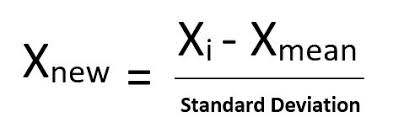

    where: 
       - X = original number
       - Mean = average of all numbers
       - Standard deviation (σ) = how spread out numbers are  
       X new = new number after standardization

4. Step-by-Step Example:
   - Data: [150, 160, 170, 180, 190]  
  - Step 1: Find the mean (average)
   - Mean = (150 + 160 + 170 + 180 + 190)/5 = 170

      - Average height is 170.


  - Step 2: Find standard deviation (spread)
     - Find difference from mean:

        Height	   X - Mean
          150	    -20
          160	    -10
          170        0
          180	     10
          190	     20

     2. Square differences: (-20)²=400, (-10)²=100, 0²=0, 10²=100, 20²=400

     3. Find average of squares: (400+100+0+100+400)/5 = 1000/5 = 200
     
     4. Take square root → σ = √200 ≈ 14.14


    Step 3: Standardize each value:

          - 𝑋 new = (𝑋 − 170) / 14.14
	​

  - 150 → (150-170)/14.14 = -20/14.14 ≈ -1.41
  - 160 → -0.71
  - 170 → 0
  - 180 → 0.71
  - 190 → 1.41

✅ Now each number shows how far it is from the average.
    - Negative → below average
    - Positive → above average
    - 0 → exactly average


5. Simple Analogy:
   - Imagine a see-saw balanced at 170 cm (mean):
      - 150 → far left (-1.41)
      - 160 → left (-0.71)
      - 170 → center (0)
      - 180 → right (0.71)
      - 190 → far right (1.41)

    - Standardization tells the position relative to the center (average), instead of just raw numbers.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('data.csv')
df

,Student,Age,Study Hours,Income,Marks,Gender
0,S1,17,2,5000,55,Male
1,S2,18,5,12000,72,Female
2,S3,17,7,25000,80,Female
3,S4,19,1,4000,50,Male
4,S5,18,6,15000,78,Female
5,S6,20,3,8000,60,Female
6,S7,21,8,30000,88,Male
7,S8,19,4,10000,65,Male


In [8]:
df.describe()

,Age,Study Hours,Income,Marks
count,8.000000,8.00000,8.00000,8.000000
mean,18.625000,4.50000,13625.00000,68.500000
std,1.407886,2.44949,9364.63713,13.223356
min,17.000000,1.00000,4000.00000,50.000000
25%,17.750000,2.75000,7250.00000,58.750000
50%,18.500000,4.50000,11000.00000,68.500000
75%,19.250000,6.25000,17500.00000,78.500000
max,21.000000,8.00000,30000.00000,88.000000


In [ ]:
# Plot the scatter plot between age and income salary

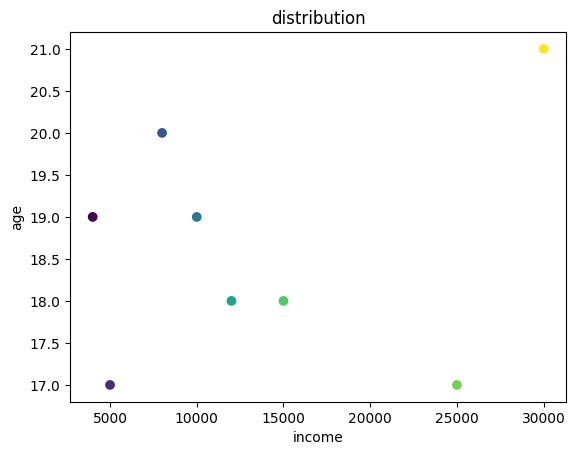

In [9]:
plt.title("distribution")
plt.xlabel("income")
plt.ylabel('age')
plt.scatter(df["Income"], df['Age'],c = df['Marks'])

NORMALIZATION

In [10]:
# separate the data

In [11]:
x = df[['Age', 'Income']]

In [12]:
x

,Age,Income
0,17,5000
1,18,12000
2,17,25000
3,19,4000
4,18,15000
5,20,8000
6,21,30000
7,19,10000


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.        , 0.03846154],
       [0.25      , 0.30769231],
       [0.        , 0.80769231],
       [0.5       , 0.        ],
       [0.25      , 0.42307692],
       [0.75      , 0.15384615],
       [1.        , 1.        ],
       [0.5       , 0.23076923]])

In [16]:
x_scaled[:, 0].max(), x_scaled[:, 0].min()

(np.float64(1.0), np.float64(0.0))

In [18]:
x_scaled[:, 1].max(), x_scaled[:, 1].min()

(np.float64(1.0), np.float64(0.0))

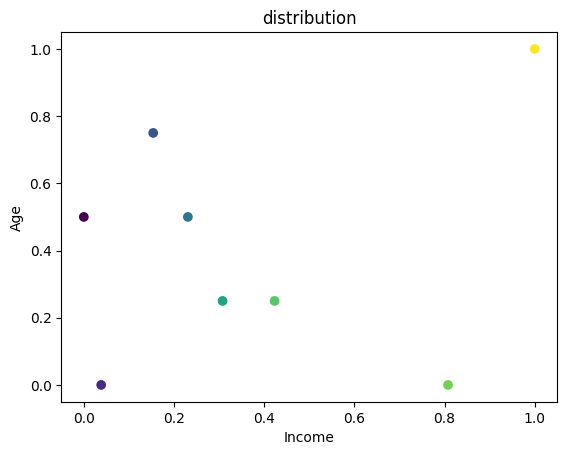

In [21]:
plt.title("distribution")
plt.xlabel("Income")
plt.ylabel("Age")
plt.scatter(x_scaled[:, 1], x_scaled[:, 0], c = df['Marks'])

STANDARDIZATION

In [22]:
x

,Age,Income
0,17,5000
1,18,12000
2,17,25000
3,19,4000
4,18,15000
5,20,8000
6,21,30000
7,19,10000


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
x_scaled = scaler.fit_transform(x)

In [26]:
pd.DataFrame(x_scaled).describe()

,0,1
count,8.000000,8.000000
mean,0.000000,0.000000
std,1.069045,1.069045
min,-1.233905,-1.098767
25%,-0.664411,-0.727755
50%,-0.094916,-0.299664
75%,0.474579,0.442361
max,1.803400,1.869332


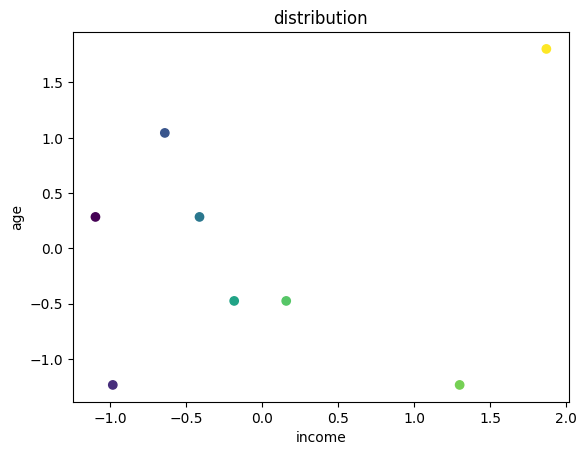

In [28]:
plt.title("distribution")
plt.xlabel("income")
plt.ylabel("age")
plt.scatter(x_scaled[:, 1], x_scaled[:, 0], c = df['Marks']);
